# EDA King County Data - Historical houses

In [ ]:
from IPython.display import Image
Image("house.jpg")

## Agenda
* 1 Peeking into the data set
** 1.1 Loading packages and data
** 1.2 Data overview
** 1.3 Data transformation & cleaning
* 2 Stakeholder requirements and resulting hypotheses
* 3 Glimpse on results
* 4 Data exploration and trimming with regard to hypotheses
* 5 Data analysis
** 5.1 **H1** The time of selling influences the price of historical houses. 
** 5.2 **H2** There are some features that increase the sales price of historical houses.
* 6 Location of historic houses by age bucket
* 7 Recommendations
* 8 Future work

# 1 Peeking into the data set


### 1.1 Loading packages and data

In [2]:
#Loading packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='talk', palette='magma') 
import matplotlib.style as style
style.use('grayscale')

#Plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

from wordcloud import WordCloud

pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline 

In [3]:
#Reading in the dataset
data = pd.read_csv("kingcounty.csv")

### 1.2 Data overview

In [4]:
#Show number of rows and colums
print(data.shape)
#Show column names
print(data.columns)

(21597, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


***Variable definitions***
* **id** - unique identified for a house
* **date** - house was sold
* **pricePrice** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
#Look at the data type for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#Show top 5-rows and all colums
data.head().round()
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


### 1.3 Data transformation and cleaning

In [7]:
#Find missing values and replace them by zeros
data.isnull().sum().sort_values()

id                  0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
sqft_above          0
grade               0
sqft_living15       0
condition           0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
date                0
sqft_lot15          0
view               63
waterfront       2376
yr_renovated     3842
dtype: int64

In [8]:
#Replace missings
#Replace missing values by zeros
data['view'].fillna(0, inplace=True)
data['sqft_basement'].fillna(0, inplace=True)
data['waterfront'].fillna(0, inplace=True)

#Replace yr_renovated by yr_built if yr_renovated is missing
data['yr_renovated'].fillna(data['yr_built'], inplace=True)

#Check if it worked
#data.isnull().sum().sort_values()

In [9]:
#Conversion of sales dates to month and years
data["year"] = pd.DatetimeIndex(data["date"]).year
data["month"] = pd.DatetimeIndex(data["date"]).month
data['date'] = pd.to_datetime(data["date"])

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,0.00,0.00,...,0.0,1955,0.00,98178,47.51,-122.26,1340,5650,2014,10
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,...,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639,2014,12
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,...,0.0,1933,"1,933.00",98028,47.74,-122.23,2720,8062,2015,2
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,...,910.0,1965,0.00,98136,47.52,-122.39,1360,5000,2014,12
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,...,0.0,1987,0.00,98074,47.62,-122.05,1800,7503,2015,2


21597


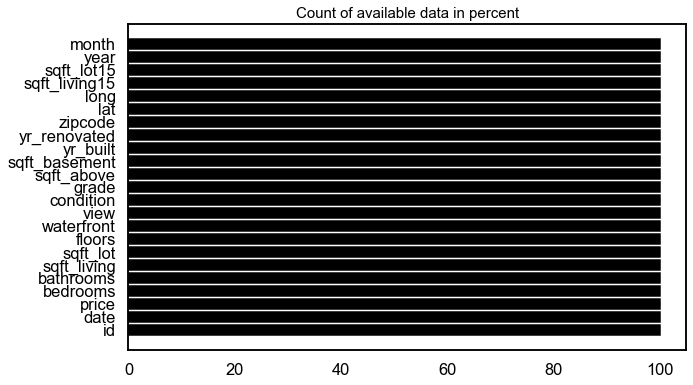

In [10]:
#Check for further missings
all_var = data.columns
#print(all_var)

count = []
for var in all_var:
    length = data[var].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(data), 2)

print(len(data))

#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(all_var, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

#There appear to be no more missings.

In [11]:
#Check for duplicates along the case ID
print(sum(data.duplicated(['id'])))

#Delete duplicates
#Note: The first case is kept. Cases with the same IDs that came into the data set at a later point in time are dropped
data = data.drop_duplicates(['id'], keep='first')
sum(data.duplicated(['id'])) #equals zero, indicating that all duplicates are dropped. 

177


0

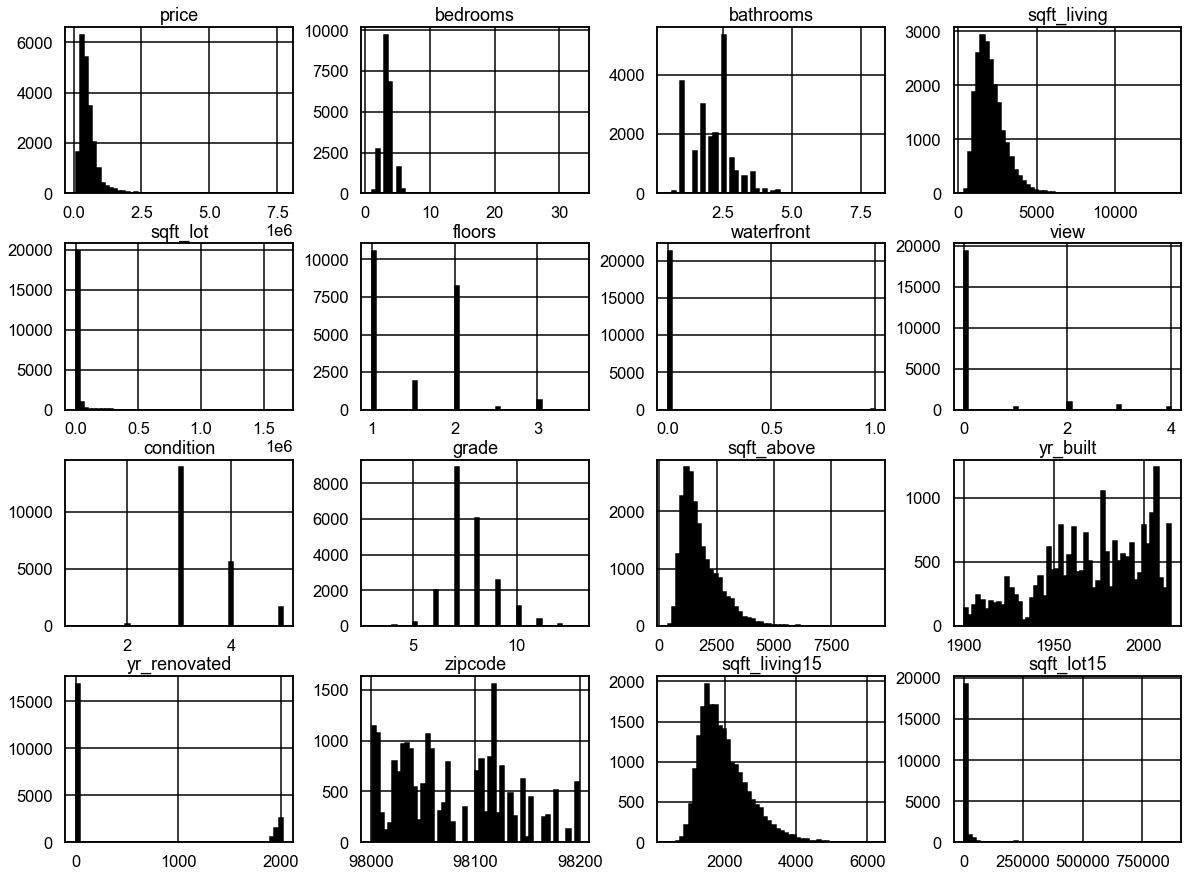

In [12]:
#Check distribution of variables by plotting histograms
data.hist(['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15'], bins = 50, figsize = (20, 15), color='black');

## ...before I start further exploring and trimming the data, I talk to the stakeholder again

## 2 Stakeholder requirements and resulting hypotheses

### Stakeholder Requirements
The seller wants to sell historical houses. She requires to...
   * know the best time to sell to maximize sales profit
   * know which features maximize sales profit of historical houses
   * understand if there is a difference between the prices of historical and modern houses

### Hypotheses
   * H1: The time of selling influences the price. 
   * H2: There are some features that increase the sales price of historical houses (e.g. #bathrooms, water view) 
   * H3: There is a difference between the prices of historical and modern houses.

## 3 Glimpse on results 
* H1: There is no real best time. 
* H2: Yes there are! - Square foot of living & overall grade  
* H3: tba.

## 4 Data exploration and trimming with regard to hypotheses

count   3,974.00
mean    1,924.49
std        12.89
min     1,900.00
25%     1,914.00
50%     1,925.00
75%     1,937.00
max     1,944.00
Name: yr_built, dtype: float64
3974


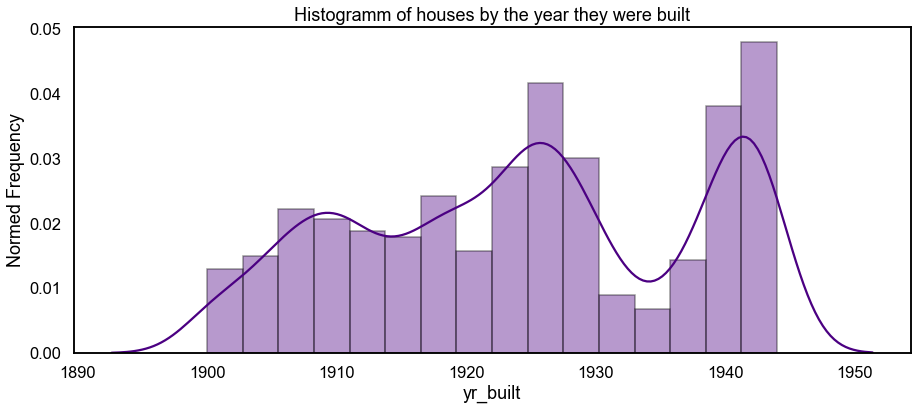

In [13]:
#Exploring and trimming

#Data set with historical houses built before 1945
hdata = data[data['yr_built'] < 1945]
print(hdata.describe().yr_built) #There are only houses from 1900 to 1944 in the data set
print(hdata['id'].count()) #There are 3974 historical houses in the dataset

#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(hdata['yr_built'], color='indigo')
plt.title('Histogramm of houses by the year they were built')
plt.ylabel('Normed Frequency')
plt.show()

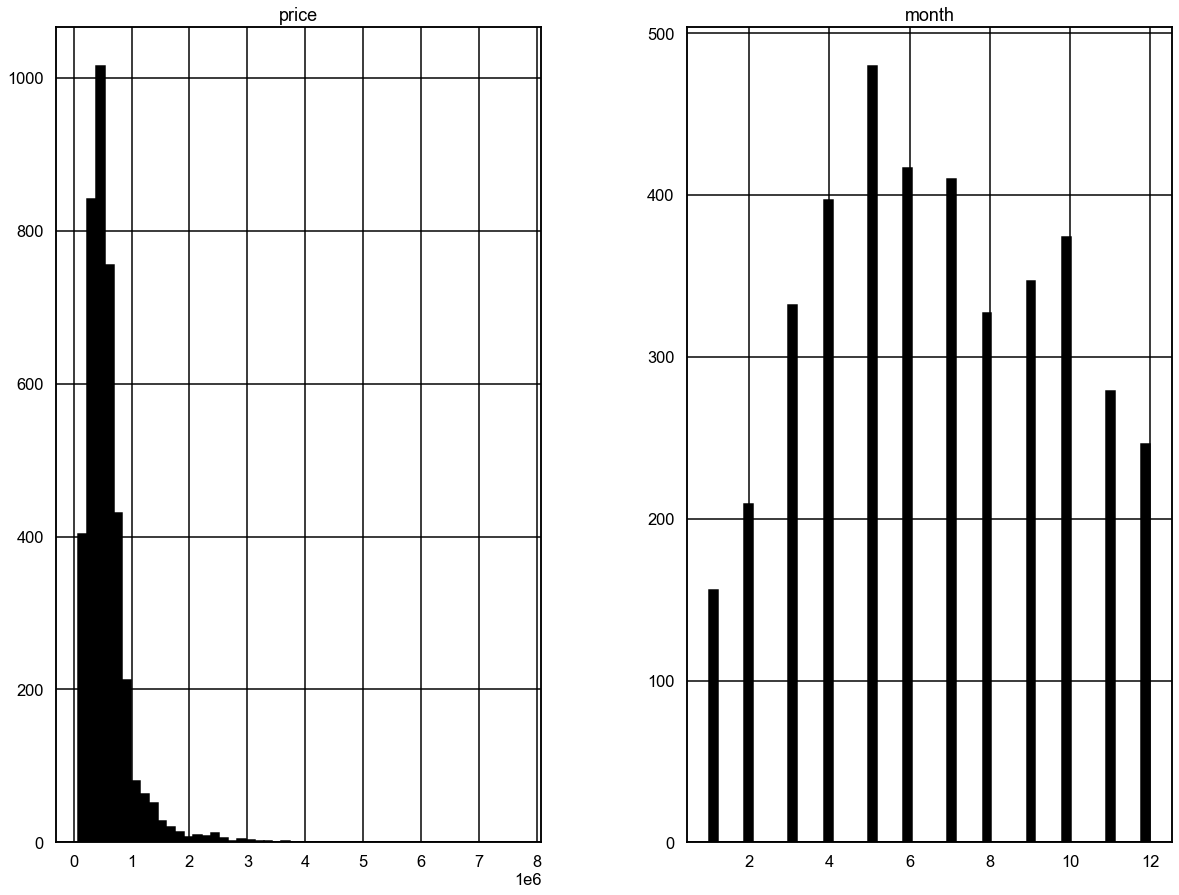

In [14]:
#Variables needed to investigate H1: month of sale and price
hdata.hist(['price', 'month'], bins = 50, figsize = (20, 15));

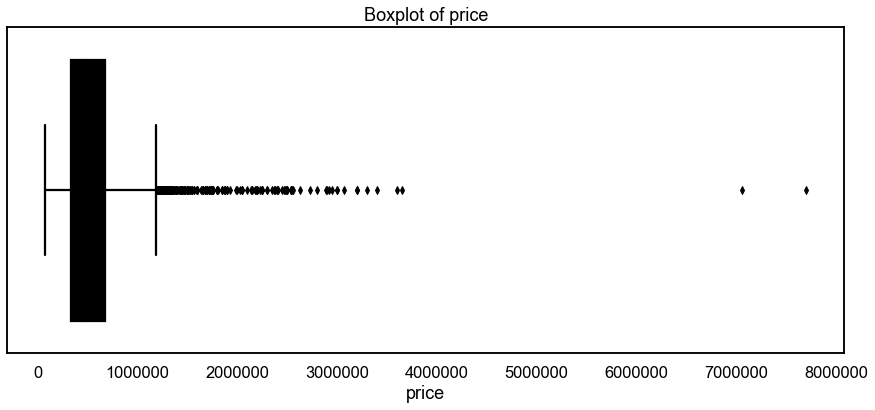

In [15]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='price', data=hdata)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of price')
plt.show()

In [16]:
#Cut off outliers
print(hdata.price.describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).round())

count       3,974.00
mean      567,724.00
std       402,603.00
min        78,000.00
1%        130,000.00
5%        193,650.00
25%       335,000.00
50%       490,000.00
75%       677,375.00
95%     1,230,000.00
99%     2,250,000.00
max     7,700,000.00
Name: price, dtype: float64


count       3,903.00
mean      538,309.00
std       288,009.00
min       102,500.00
1%        137,922.00
5%        197,230.00
25%       334,949.00
50%       485,000.00
75%       667,000.00
95%     1,100,000.00
99%     1,599,400.00
max     1,990,000.00
Name: price, dtype: float64


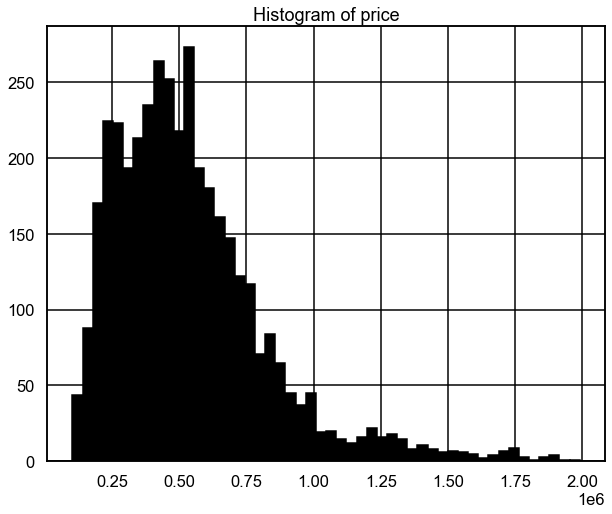

In [17]:
hdata = hdata[(hdata['price'] < 2000000) & (hdata['price'] > 100000)]      
      
print(hdata.price.describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).round())
hdata.hist(['price'], bins = 50, figsize = (10, 8))
plt.title('Histogram of price');

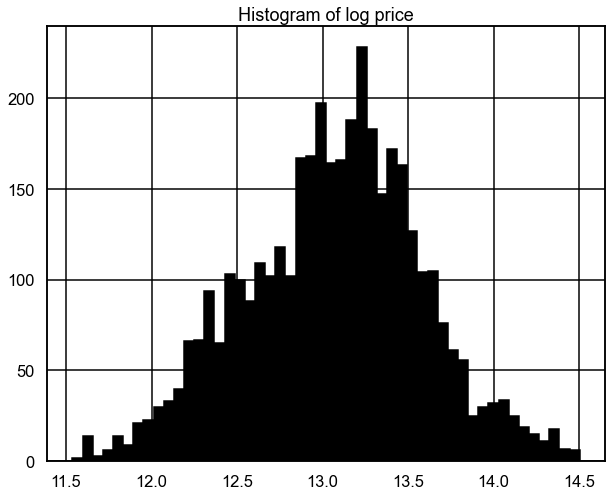

In [18]:
#Taking the log of pricesq to make distribution more normal
hdata['lprice'] = np.log(hdata['price'])
hdata.hist(['lprice'], bins = 50, figsize = (10, 8))
plt.title('Histogram of log price');

# 5 Data analysis

## 5.1 **H1**: The time of selling influences the price of historical houses. 

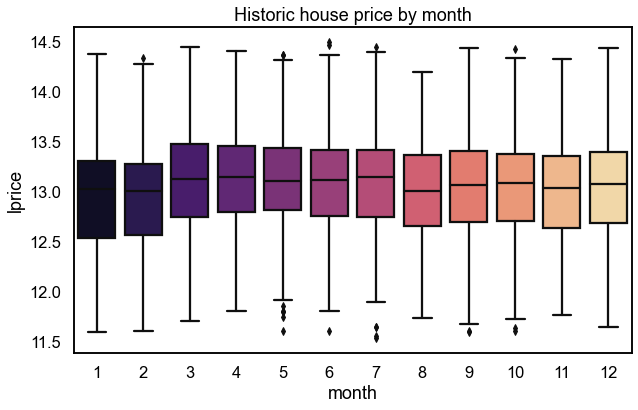

In [19]:
#Boxplot of historic house prices by month
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='lprice', data=hdata, palette='magma')
plt.title('Historic house price by month')
plt.show()
#Differences in sales month do not appear to be very large

In [20]:
#Calculation of median price per month
median_lprice = hdata.groupby('month')['price'].median()
print(median_lprice)
#Slightly higher prices are reachead in April and July. 

month
1    455,000.00
2    450,000.00
3    505,200.00
4    515,000.00
5    495,000.00
6    499,975.00
7    515,000.00
8    450,000.00
9    477,000.00
10   485,000.00
11   462,500.00
12   480,000.00
Name: price, dtype: float64


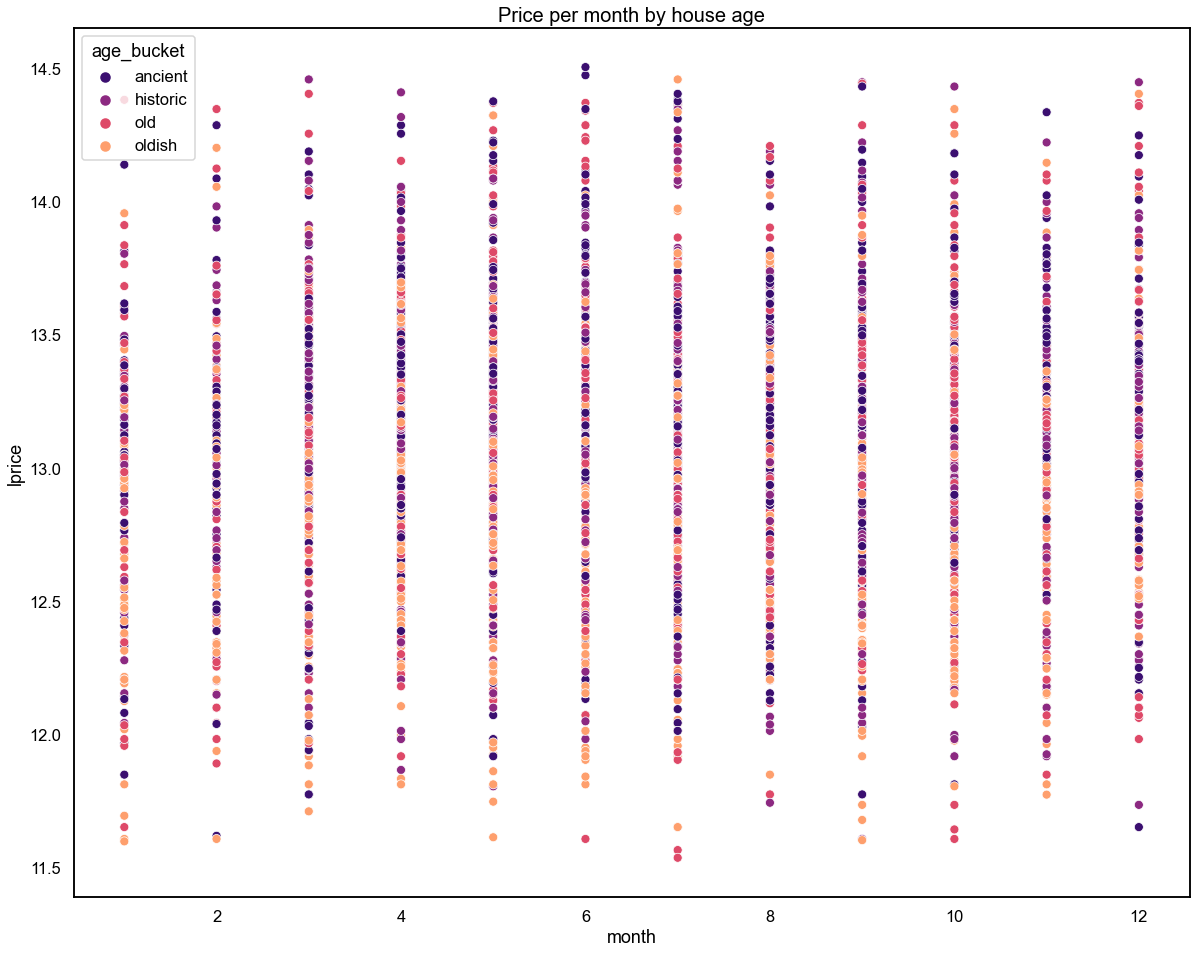

In [21]:
#Creating age buckets - There are houses from 1900 to 1944 in the data set
age_bucket = ['ancient', 'historic', 'old', 'oldish']
hdata['age_bucket'] = pd.qcut(hdata['yr_built'],
                              q=[0, .25, .5, .75, 1],
                              labels=age_bucket)

plt.figure(figsize=(20,16))
sns.scatterplot(data=hdata, x="month", y="lprice", hue='age_bucket', palette='magma')
plt.title('Price per month by house age', fontsize=20)
plt.show()

#There are no patters visible. There is no group of houses where the sales price is significantly higher. 

In [22]:
#Conclusion
#Price are slightly higher in April and July.
#The age of houses does not appear to influcence the sales price significantly. 

## 5.2 **H2**: There are some features that increase the sales price of historical houses


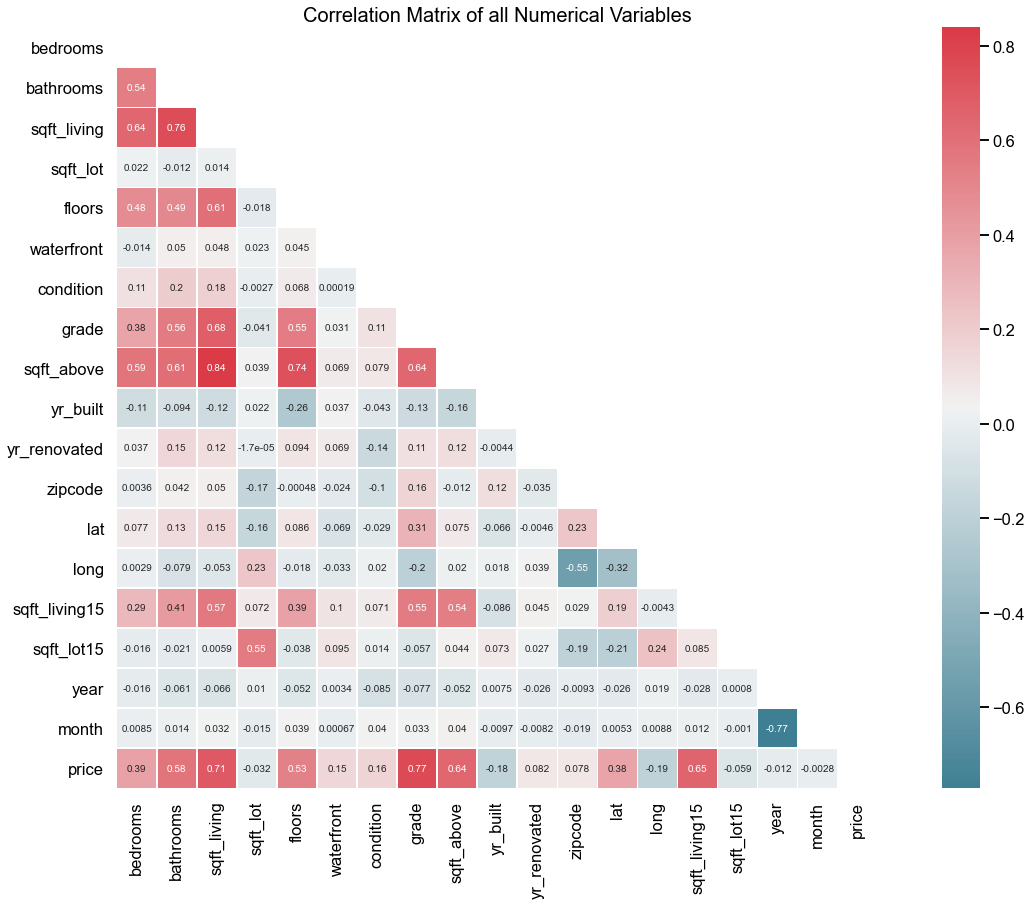

In [23]:
#Calculation of correlations
#print(corr['price'])

# Correlation Matrix
# Compute the correlation matrix
d= hdata[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'price']]
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(23, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables', fontsize=20)
plt.show()

#According to correlation matrix sqft_living and grade are strongly correlated with the price. 

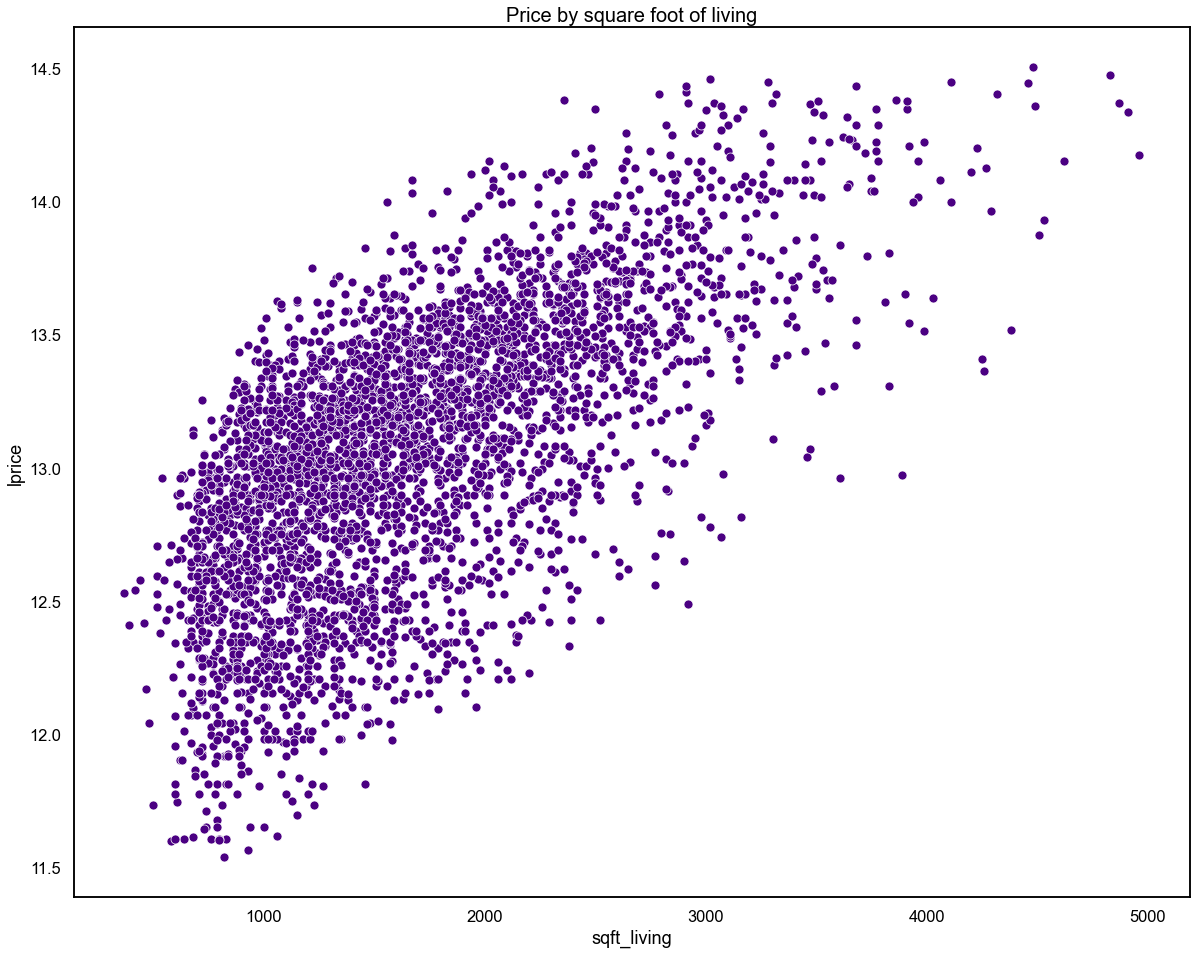

In [24]:
#Price by square foot of lifing
plt.figure(figsize=(20,16))
sns.scatterplot(data=hdata, x="sqft_living", y="lprice", color='indigo')
plt.title('Price by square foot of living', fontsize=20)
plt.show()
#The house price inceases with its size.

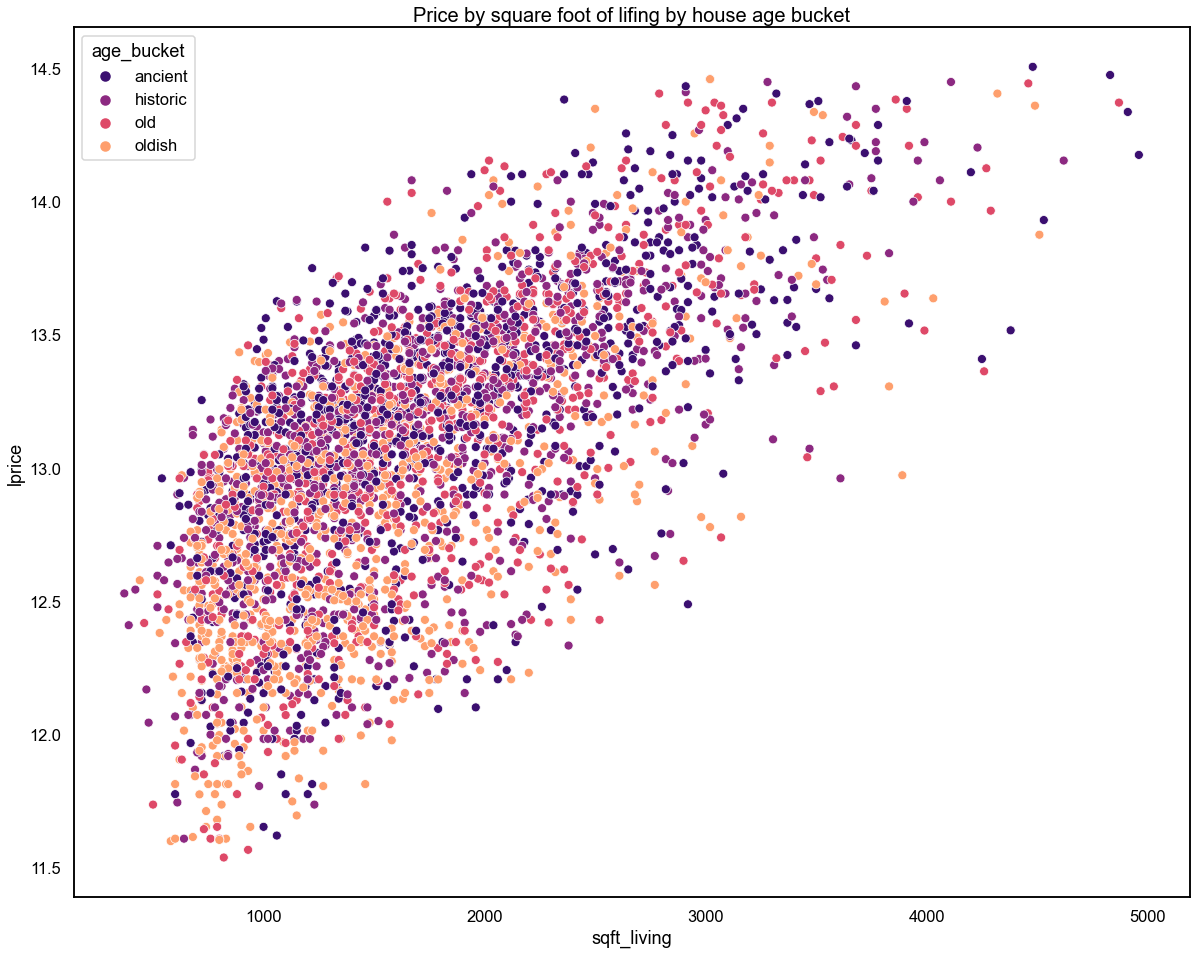

In [25]:
#Price by square foot of living by age bucket
plt.figure(figsize=(20,16))
sns.scatterplot(data=hdata, x="sqft_living", y="lprice", hue='age_bucket', palette='magma')
plt.title('Price by square foot of lifing by house age bucket', fontsize=20)
plt.show()
#Again there is no pattern visible. Older houses do not sell for a higher price, even if they are bigger/smaller. 

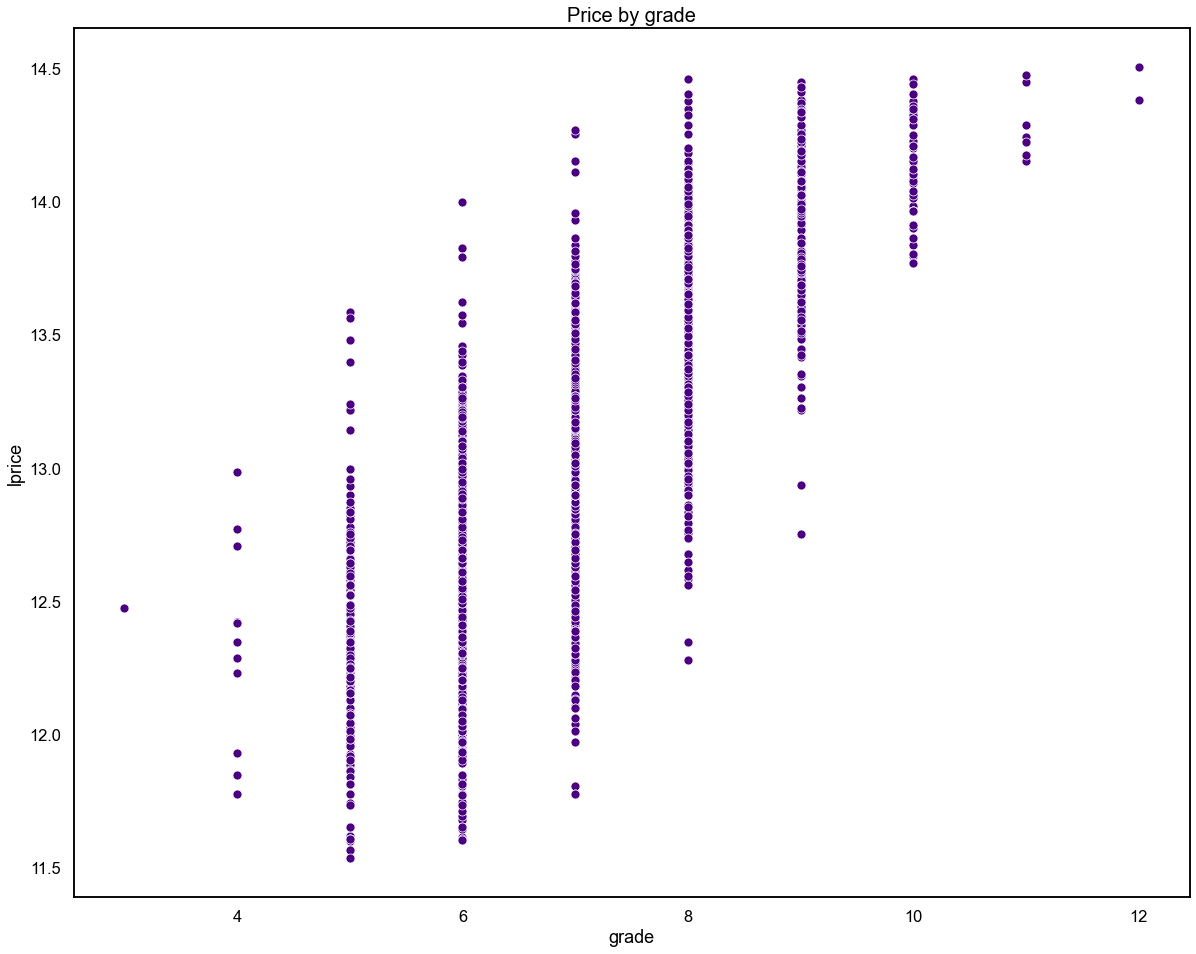

In [26]:
#Price by overall grading of house
plt.figure(figsize=(20,16))
sns.scatterplot(data=hdata, x="grade", y="lprice", color='indigo')
plt.title('Price by grade', fontsize=20)
plt.show()
#The house price inceases with the grade.

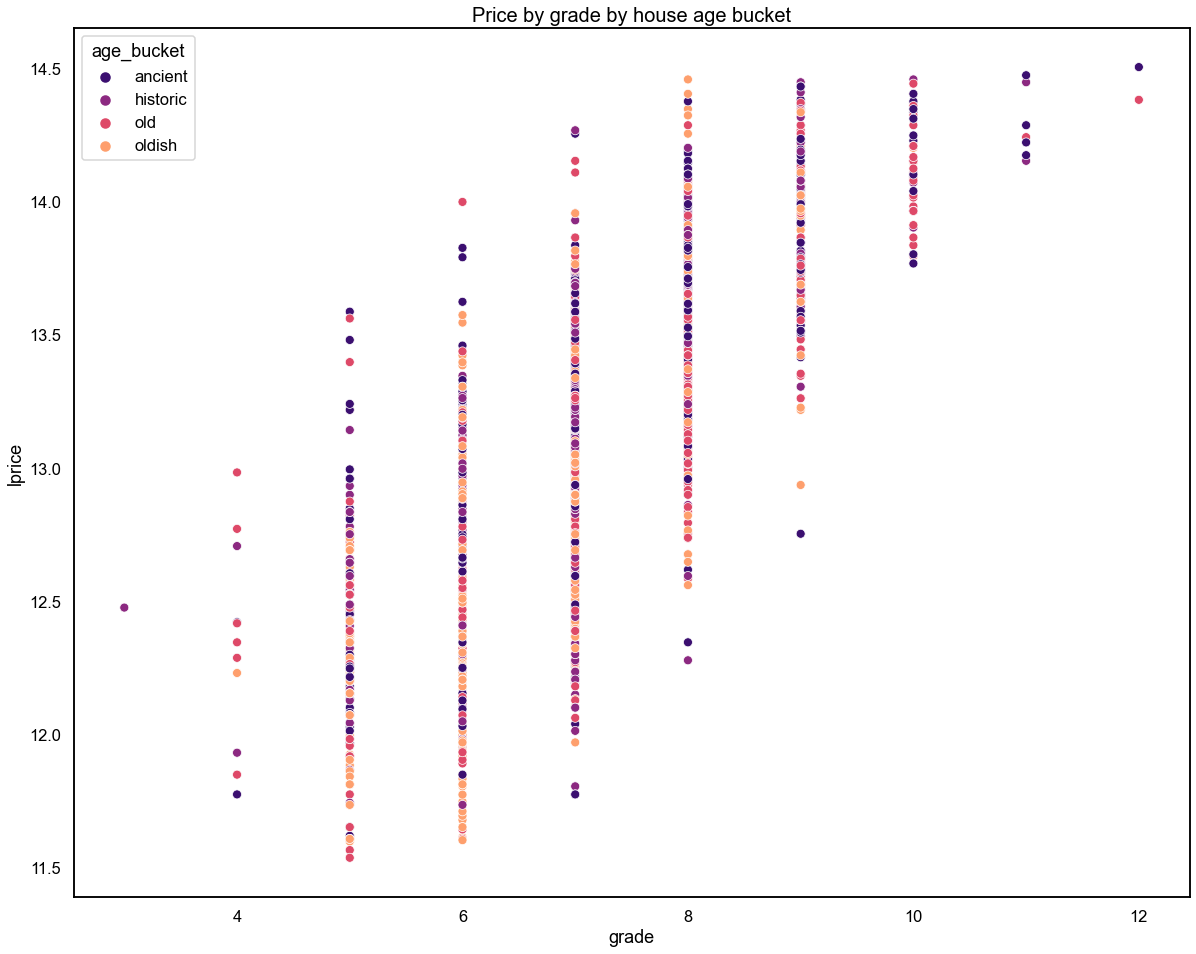

In [27]:
#Price by grade of living by age bucket
plt.figure(figsize=(20,16))
sns.scatterplot(data=hdata, x="grade", y="lprice", hue='age_bucket', palette='magma')
plt.title('Price by grade by house age bucket', fontsize=20)
plt.show()
#Again there is no pattern visible. Older houses do not sell for a higher price, even if they have a better grade. 

 ##  6 Location of historic houses by age bucket

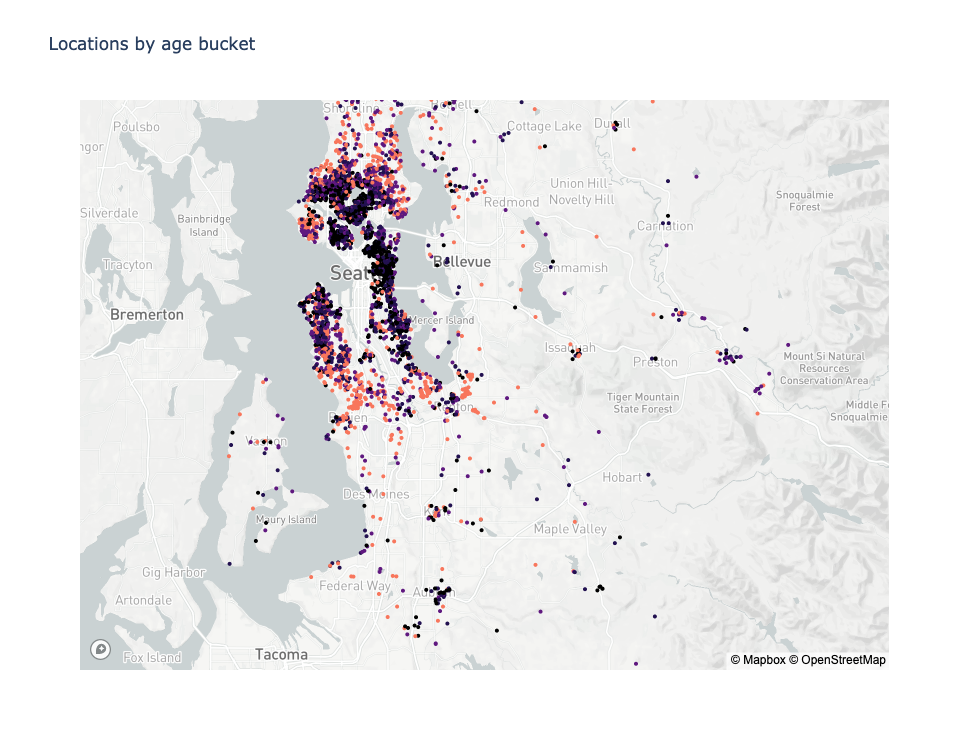

In [28]:
#Create map

#Create a list of lat and long
lats = list(hdata.lat.values)
longs = list(hdata.long.values)

#Get colors of magma palette
pal = sns.color_palette("magma")
#print(pal.as_hex())

#set colors
hdata["color"] = ""
hdata.color[hdata.age_bucket == 'ancient'] = "rgb(0,0,0)" #black
hdata.color[hdata.age_bucket == 'historic'] = '#221150' #purple
hdata.color[hdata.age_bucket == 'old'] = '#5f187f'
hdata.color[hdata.age_bucket == 'oldish'] = '#f8765c'

#Create map
mapbox_access_token = 'pk.eyJ1IjoiZGFya2NvcmUiLCJhIjoiY2pscGFheHA1MXdqdjNwbmR3c290MTZ6dCJ9.K1FMv_q3ZVlKP13RrjFkjg'

mapp = [go.Scattermapbox(lat=lats,lon=longs,mode="markers",marker=dict(size=4.5,color=hdata["color"]) ,hoverinfo="text",text=" Built Year:"+hdata.yr_built.apply(str))]

layout5 = dict(title="Locations by age bucket",width=800,height=750,hovermode="closest",mapbox=dict(bearing=0,pitch=0,zoom=9,center=dict(lat=47.5,lon=-122.161),accesstoken=mapbox_access_token))

fig5 = go.Figure(data=mapp,layout=layout5)

iplot(fig5)

## 7 Recommendations
* **H1** 
** Since the prices of historic are slightly higher in April and July, try to sell in these month. 
* **H2** 
** Since the house price inceases with the size (square foot of living), try to sell the larger houses first, if you need profit fast.
** Since the house price inceases with the grade, try to sell the houses with the best grades first, before they get downgraded. 


* **Refine the analyis for further insights**
** Exact age, squarefoot of living and grade of the houses to be sold 
** Information on other features of the houses, e.g. if renovated, exact neiborhood


## 8 Future work
* Investigate hypothesis H3 on the differences between the prices of historical and modern houses.
* Set the number & price of historic houses in relation to modern houses
* Change color of heatmap, so it fits to the rest of my color scheme